# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

##TALLER 1
##MODULO 1 DIPLOMADO EN ANALITICA EN MERCADOS DE ENERGIA
##NOMBRE: MARIA CLARA BETANCUR CASTRILLÓN 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).  Imprima el encabezamiento de la tabla usando `head()`. 

In [56]:
import pandas as pd
                
x=[]

for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip=2
   
    nombrearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>=2016:
        nombrearchivo +='.xls'
    else:
        nombrearchivo+='.xlsx'
        
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    x.append(y)
z=pd.concat(x)
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [57]:
# forma un nuevo archivo eliminando los registros faltantes
y=z.dropna()  
len(z)-len(y)

28

**3.--** Compute e imprima el número de registros duplicados.

In [58]:
#Los datos guardados en Z, se le aplica la función de leer la longitud del arreglo en cuanto a los duplicados 
len(z[z.duplicated()])

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [59]:
# La función drop permite borrar los datos na para los faltantes y duplicados
#por ultimo, vuelve a leer la longitud del arreglo
y=z.dropna()  
y=y.drop_duplicates() 
len(y)

7875

**5.--** Compute y grafique el precio primedio diario.

In [60]:
## Se llama a PM el Promedio Diario
PM=y.mean(axis=1)
y["Promedio"]=PM
y.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Promedio
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167


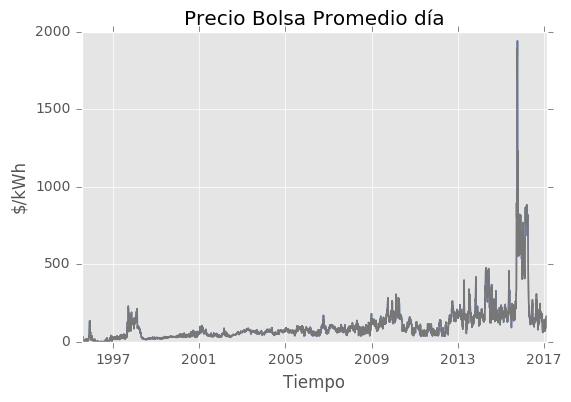

In [134]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
a = pd.to_datetime(y["Fecha"])
b = y["Promedio"]
plt.plot(a,b)
plt.ylabel("$/kWh")
plt.xlabel ("Tiempo")
plt.title ("Precio Bolsa Promedio día")
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [62]:
## Sea PMAX el arreglo para guardar los valores correspondientes al precio máximo mensual
PMAX=[]
for n in range (len(y["Fecha"])):
    PMAX.append(str(y.iloc[n,0])[0:7])
y["año-mes"]=PMAX
y.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,Promedio,año-mes
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167,1995-07


In [63]:
Maxmes=y.groupby("año-mes").max()
Maxmes=Maxmes.max(axis=1)
Maxmes.head()

año-mes
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

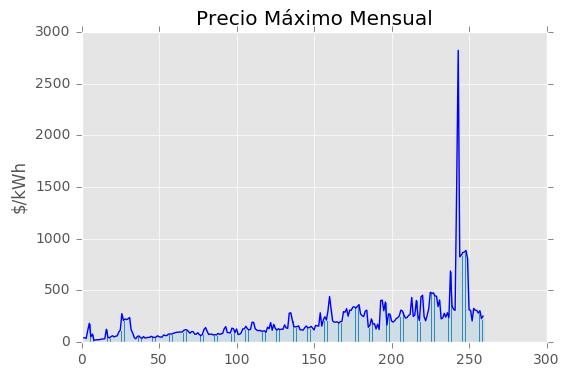

In [85]:
plt.plot(range(len(Maxmes)),Maxmes,label="Máximo Mes",color="b")
plt.ylabel("$/kWh")
plt.title ("Precio Máximo Mensual")
plt.bar(range(len(Maxmes)),Maxmes)
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [66]:
Minmes=y.groupby("año-mes").min()
Minmes=Minmes.min(axis=1)
Minmes.head()

año-mes
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64

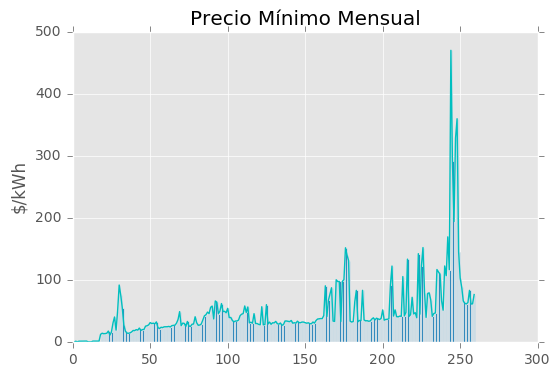

In [86]:
plt.plot(range(len(Minmes)),Minmes,label="Mínimo Mes",color="c")
plt.ylabel("$/kWh")
plt.title ("Precio Mínimo Mensual")
plt.bar(range(len(Minmes)),Minmes)
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [69]:
Promes=y.groupby("año-mes").mean()
Promes=Promes.mean(axis=1)

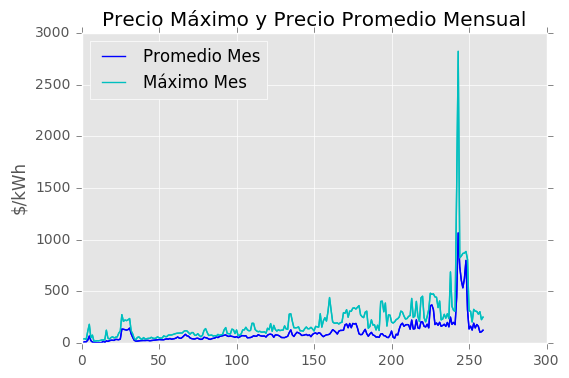

In [124]:
plot1, =plt.plot(range(len(Promes)),Promes,label="Promedio Mes",color="b")
plot2, =plt.plot(range(len(Maxmes)),Maxmes,label="Máximo Mes",color="c")
plt.legend(handles=[plot1, plot2],loc=2)
plt.ylabel("$/kWh")
plt.title ("Precio Máximo y Precio Promedio Mensual")
plt.axhspan(0.9, 1, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [92]:
Dia=[1,2,3,1,1,1,1]*int(len(y)/7)  ## el 21 de julio es viernes.  laborales 1, sabado 2 domingo 3
y["Dia"]=Dia

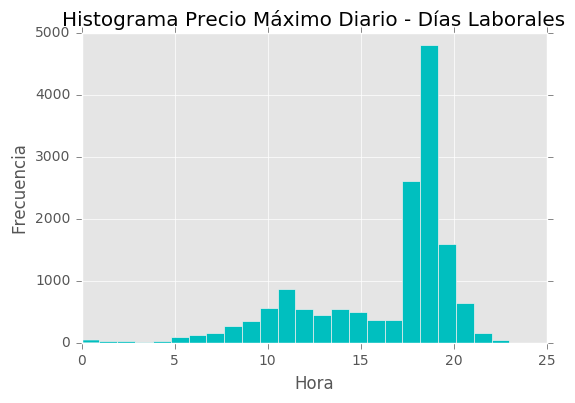

In [103]:
laboral=y[y["Dia"]==1]  ## Dias laborales
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='c')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Días Laborales")
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

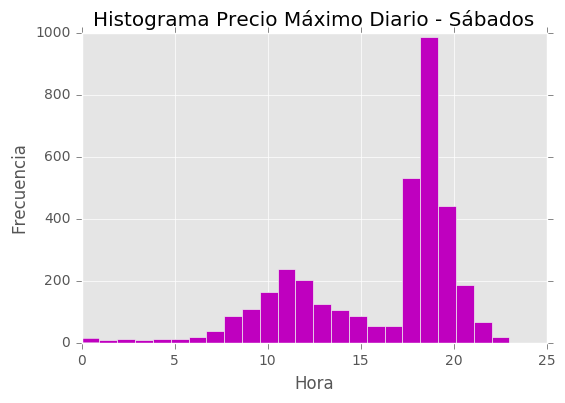

In [106]:
laboral=y[y["Dia"]==2]  ## Dias sábado
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='m')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Sábados")
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

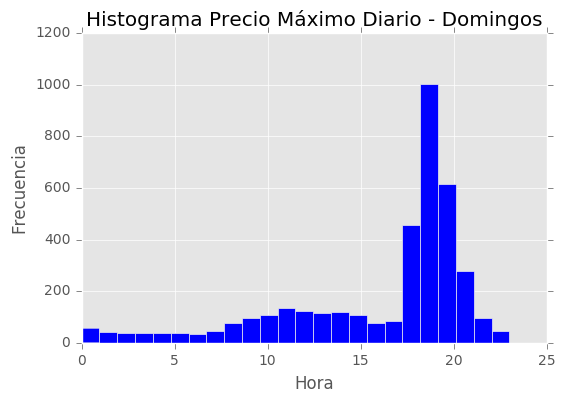

In [27]:
laboral=y[y["Dia"]==3]  ## Dias Domingo
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='blue')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Domingos")
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [28]:
w=y.min(axis=1)
y["Min"]=w

In [29]:
v=[]
for n in range (len(y["Fecha"])):
    v.append(str(y.iloc[n,0])[0:4])
y["año"]=v
y.tail()

,Fecha,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,Promedio,año-mes,Dia,Min,año
38,2017-02-08,116.070672,116.070672,116.070672,116.070672,116.070672,116.070672,119.070672,119.070672,126.570672,...,249.215672,151.070672,126.570672,126.570672,116.070672,131.514214,2017-02,3,3.0,2017
39,2017-02-09,117.853455,125.852455,110.853455,110.853455,115.833455,125.852455,125.852455,125.852455,125.853455,...,206.853455,182.353455,125.853455,125.852455,117.853455,133.727413,2017-02,1,1.0,2017
40,2017-02-10,133.799407,133.799407,117.799407,117.799407,125.699407,133.799407,133.799407,133.799407,161.798407,...,206.799407,221.799407,161.798407,161.798407,133.799407,167.128157,2017-02,1,1.0,2017
41,2017-02-11,132.603212,131.604212,131.604212,131.604212,131.604212,131.604212,132.603212,132.603212,132.603212,...,207.604212,163.104212,162.604212,162.604212,132.603212,151.908170,2017-02,1,1.0,2017
42,2017-02-12,141.109843,141.109843,141.109843,139.610843,128.110843,162.010843,128.110843,128.110843,141.109843,...,162.010843,151.110843,151.110843,141.109843,141.109843,142.414385,2017-02,1,1.0,2017


In [30]:
## Mínimo Pbolsa por año
Minano=y.groupby("año").min()
Minano=Minano.min(axis=1)
Minano

año
1995    0.0
1996    0.0
1997    1.0
1998    1.0
1999    1.0
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
dtype: float64

In [31]:
## Como el mínimo ocurre más de una fecha del año, se buscarán las fechas en que se presentó.
Tabla=[]
for j in range (1995,2018):  # se hace un recorrido por años
    ano = y[y["año"]==str(j)]
    ano=ano[["Fecha","año","Min"]] # se elije tabla solo con columnas fecha, año y minimo
    minano=[]
    minano1=[]
    minano1=pd.Series(ano["Min"]).values # se elije la serie de mínimos para el año
    minano.append ([i for i,e in enumerate(minano1) if e== min(minano1)]) #posición del mínimo
    #artificio para volver a una serie lo obtenido
    contar=[]
    for n in range (len(minano)):
        for i in range (len(minano[n])):
            contar.append(minano[n][i])
    # Creación de tabla con fecha del mínimo, el mínimo y el año
    Tfecha=[]
    Tano=[]
    Tmin=[]
    for n in range (len(contar)):
        Tfecha.append(ano.iloc[contar[n],0]) #Usando la posición lee el valor del archivo original "ano"
        Tano.append(ano.iloc[contar[n],1])
        Tmin.append(ano.iloc[contar[n],2])
    Total=[]
    Total=pd.DataFrame(Tano, columns=["Año"])
    Total ["Mínimo"]=Tmin
    Total ["Fechas_ocurrencia"]=Tfecha
    Tabla.append(Total)
Ttabla=pd.concat(Tabla)
Ttabla

,Año,Mínimo,Fechas_ocurrencia
0,1995,0.0,1995-07-26
1,1995,0.0,1995-07-28
2,1995,0.0,1995-07-29
3,1995,0.0,1995-07-30
4,1995,0.0,1995-07-31
5,1995,0.0,1995-08-01
6,1995,0.0,1995-10-13
0,1996,0.0,1996-05-10 00:00:00
1,1996,0.0,1996-06-30 00:00:00
2,1996,0.0,1996-07-04 00:00:00


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [111]:
##Adiciono columna año-mes a y
v=[]
for n in range (len(y["Fecha"])):
    v.append(str(y.iloc[n,0])[0:7])
y["año_y_mes"]=v

In [112]:
##Calculo promedio mes
Promes=y.groupby("año_y_mes").mean()
Promes=Promes.mean(axis=1)

In [113]:
## Se almacena en lista los años-meses
p=list(Promes.axes[0])

In [114]:
tanomes=[]
for n in range(len(p)): 
    mes=[Promes[n]]*len(y[y["año_y_mes"]==p[n]])
    tanomes.append(mes)
##tanomes
#artificio para volver a una serie lo obtenido
contar=[]
for n in range (len(tanomes)):
    for i in range (len(tanomes[n])):
        contar.append(tanomes[n][i])

In [115]:
##Adiciono columna Promedio-mes
y["Promedio_mes"]=contar

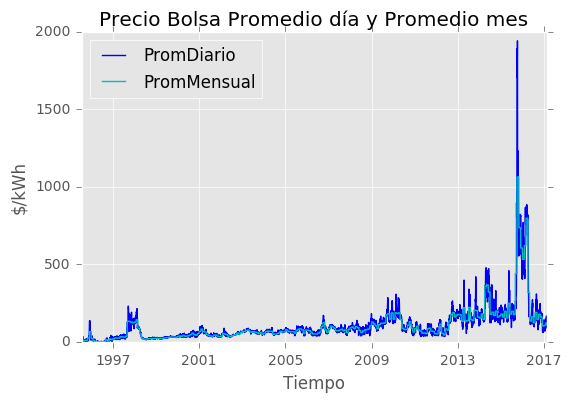

In [130]:
##Grafico
import matplotlib.pyplot as plt
a = pd.to_datetime(y["Fecha"])
b = y["Promedio"]
c = y["Promedio_mes"]
plot1, =plt.plot(a,b, label="PromDiario",color="b")
plot2, =plt.plot(a,c,label="PromMensual",color="c")
plt.legend(handles=[plot1, plot2],loc=2)
plt.ylabel("$/kWh")
plt.xlabel ("Tiempo")
plt.title ("Precio Bolsa Promedio día y Promedio mes")
plt.show()

---

In [ ]:
## Dirección URL para acceder al documento: 